<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2023/blob/main/Bayesian/Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
from matplotlib import rc
rc('font',**{'size':15,'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Exercise: Simulating the posterior of a binomial experiment

Given a binomial experiment, with $N$ trials and $n$ successes, we want to find the posterior of the parameter $\theta$, the probability of success associated with each binomial experiment: $p(\theta|n,N)$.

### First, let's simulate (Change/experiment with $n$ and $N$ for different outcomes)

In [ ]:
NS = 10**7                                      # of simulations
Ntrial, Nobs = 100, 60                         # of trials and successes in a binomial experiment
nbin = 50                                       # of bins in histogram

### Defining our prior and sampling

In [ ]:
theta = np.random.random(NS)  # Sample theta uniformly between 0 and 1, NS times (this is our uniform prior)

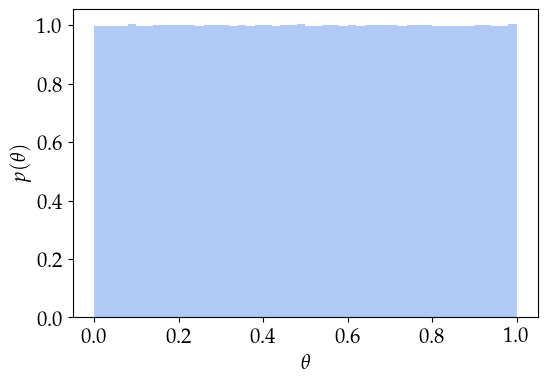

In [ ]:
# Check that prior is flat
fig = plt.figure(figsize=(6,4))
y, x, dum = plt.hist(theta, nbin, density=True, color='cornflowerblue',alpha=0.5, label='Uniform prior')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [ ]:
n = np.random.binomial(Ntrial, theta)
mask = (n == Nobs)
theta = theta[mask]  # Keep the theta's for which n = Nobs

### Now we plot a histogram of the $\theta$'s we kept, those that lead to the observed $n$: This is our simulated posterior!

In [ ]:
fig = plt.figure(figsize=(6,4))
y, x, dum = plt.hist(theta, nbin, density=True, color='cornflowerblue',alpha=0.5, label='Simulated')     # Fill histogram with kept values of theta: simulated posterior pdf for theta
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta|n,N)$')
plt.show()

### Overlay the analytical posterior

This is the simulated posterior, but we also know from theory how to write the posterior analytically, so let's add that too, for comparison. From the notes, Eq.(3.5), we know the posterior is $(N+1)$ times the binomial pmf.





In [ ]:
fig.gca().plot(x, (Ntrial+1) * binom.pmf(Nobs, Ntrial, x), linewidth=3, color='darkslategrey',alpha=0.8, label='Analytical')
fig

### Compare to a Gaussian

In some cases, we can approximate the binomial as a Gaussian, when $N$ is large and $n$ is not very close to 0 or $N$.

In [ ]:
mu, sigma = theta.mean(), theta.std(ddof=1)             # Overlay a Gaussian with mu = <p> and var = Var(p) (sample var, so ddof=1)
fig.gca().plot(x, norm.pdf(x, mu, sigma), linewidth=2, ls='dashed', color='tomato', alpha=0.9, zorder=4, label='Gaussian')
fig.gca().legend(frameon=False)
fig

### Try different values for $n$ and $N$ and see how things change!